In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Voice-Dataset.csv')

In [3]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
label_encoder = LabelEncoder()

In [6]:
label_encoder.fit(data['label'])

LabelEncoder()

In [8]:
label_encoder.classes_

array(['female', 'male'], dtype=object)

In [10]:
data['label'] = label_encoder.transform(data['label'])

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sns.set()

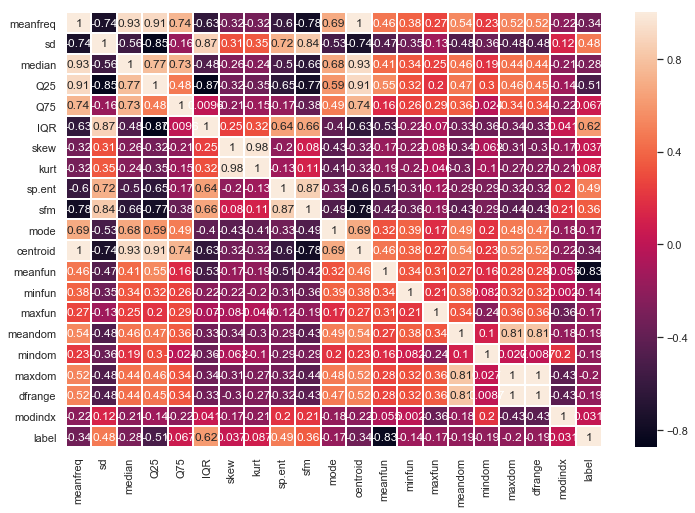

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, linecolor='w', linewidths=1)

In [16]:
training_data = data[['Q25', 'IQR', 'meanfun']]

In [17]:
output_data = data['label']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X, x_test, Y, y_test = train_test_split(training_data,
                                       output_data,
                                       test_size=0.3,
                                       random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lg_model = LogisticRegression()

In [22]:
lg_model.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
lg_predictions = lg_model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
lg_score = accuracy_score(lg_predictions, y_test)
lg_score

0.917981072555205

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn_model = KNeighborsClassifier()

In [38]:
knn_model.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [39]:
knn_prediction = knn_model.predict(x_test)

In [40]:
knn_score = accuracy_score(knn_prediction, y_test)
knn_score

0.9631966351209253

In [36]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'n_neighbors': [5, 7, 10, 15, 18]}

In [45]:
grid_search = GridSearchCV(KNeighborsClassifier(),
                           param_grid=parameters)

In [46]:
grid_search.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [5, 7, 10, 15, 18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
grid_predictions = grid_search.predict(x_test)

In [48]:
grid_score = accuracy_score(grid_predictions, y_test)
grid_score

0.9674027339642481

In [49]:
grid_search.best_params_

{'n_neighbors': 10}